In [1]:
# Connect Google Colab with my Drive
from google.colab import drive 
drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


In [2]:
# Unzip the folder 
!unzip -q /content/gdrive/MyDrive/CatsDogs.zip

In [3]:
# Import necessary libraries 
import tensorflow as tf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D,Flatten, Dropout 
from tensorflow.keras import layers

In [4]:
# Delete from the folder the corrupted images
import os 
for folder_path in ["/content/CatsDogs/Cats", "/content/CatsDogs/Dogs"]:
  for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    try:
      obj = open(file_path, "rb")
      is_jfif = tf.compat.as_bytes("JFIF") in obj.peek(10)
    finally:
      obj.close()
    if is_jfif == False:
      os.remove(file_path)

In [5]:
print("Cats photos after remotion: " +str(len(os.listdir('/content/CatsDogs/Cats'))))
print("Dogs photos after remotion: " +str(len(os.listdir('/content/CatsDogs/Dogs'))))

Cats photos after remotion: 11741
Dogs photos after remotion: 11669


In [ ]:
# Assign hyperparameters values 
INPUT_SHAPE = (128,128) 
BATCH_SIZE = 32

In [ ]:
# Create a dataframe with uncorrupted cats and dogs images 
df = pd.DataFrame(columns=["Path", "Class"])
dirs = ['/content/CatsDogs/Cats', '/content/CatsDogs/Dogs']
for dir in dirs:
  paths= os.listdir(dir)
  class_name=dir.split("/")[-1]
  df_temp = pd.DataFrame({"Path": paths, "Class": class_name})
  df_temp["Path"] = dir + "/" + df_temp["Path"].astype(str)
  df = pd.concat([df,df_temp])
df.sort_values(by="Path", inplace=True, ignore_index=True)

In [ ]:
shuffled = df.sample(frac=1,random_state=1)
shuffled.tail()

,Path,Class
10955,/content/CatsDogs/Cats/9244.jpg,Cats
17289,/content/CatsDogs/Dogs/4080.jpg,Dogs
5192,/content/CatsDogs/Cats/373.jpg,Cats
12172,/content/CatsDogs/Dogs/10413.jpg,Dogs
235,/content/CatsDogs/Cats/10221.jpg,Cats


In [ ]:
# Split into training, validation and test set
rowsplice = int(0.8*len(shuffled))
df_train_valid = shuffled.iloc[:rowsplice]
df_test = shuffled.iloc[rowsplice:]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagenA = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
datagenB= ImageDataGenerator( rescale= 1.0/255)

In [ ]:
training_ds= datagenA.flow_from_dataframe(dataframe=df_train_valid,
                                           directory="/content/CatsDogs",
                                           x_col ='Path',
                                           y_col='Class',
                                           target_size=(128,128),
                                           class_mode='binary',
                                           subset='training',
                                           seed=10)

Found 14983 validated image filenames belonging to 2 classes.


In [ ]:
validation_ds= datagenA.flow_from_dataframe(dataframe=df_train_valid,
                                             directory="/content/CatsDogs",
                                             x_col ='Path',
                                             y_col='Class',
                                             target_size=(128,128),
                                             class_mode='binary',
                                             subset='validation',
                                             seed=10)

Found 3745 validated image filenames belonging to 2 classes.


In [ ]:
test_ds= datagenB.flow_from_dataframe(dataframe=df_test,
                                             directory="/content/CatsDogs",
                                             x_col ='Path',
                                             y_col='Class',
                                             target_size=(128,128),
                                             class_mode='binary',
                                             shuffle=False,
                                             seed=10)

Found 4682 validated image filenames belonging to 2 classes.


**Models 3 w/ Dropout function** (higher rate)

In [ ]:
# Model 4(3) w/Dropout (0.2-0.5)
model_4=Sequential()

model_4.add(Conv2D(filters=32, kernel_size=(3,3),input_shape = (128,128,3)))
model_4.add(Activation(activation="relu"))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.2))

model_4.add(Conv2D(filters=64, kernel_size=(3,3)))
model_4.add(Activation(activation="relu"))
model_4.add(MaxPooling2D(pool_size=(2,2))) 
model_4.add(Dropout(0.2))

model_4.add(Conv2D(filters=64, kernel_size=(3,3)))
model_4.add(Activation(activation="relu"))
model_4.add(MaxPooling2D(pool_size=(2,2))) 
model_4.add(Dropout(0.2))

model_4.add(Flatten())
model_4.add(Dense(64)) 
model_4.add(Activation("relu"))
model_4.add(Dropout(0.5))

model_4.add(Dense(1))
model_4.add(Activation("sigmoid"))

In [ ]:
model_4.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics= ["accuracy"])
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 activation (Activation)     (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 61, 61, 64)        0         
                                                        

In [ ]:
mod_4 = model_4.fit(training_ds,epochs=50,validation_data = validation_ds)

Epoch 1/50
469/469 [==============================] - 78s 141ms/step - loss: 0.6595 - accuracy: 0.5801 - val_loss: 0.5968 - val_accuracy: 0.6724
Epoch 2/50
469/469 [==============================] - 62s 132ms/step - loss: 0.5689 - accuracy: 0.7016 - val_loss: 0.5531 - val_accuracy: 0.7108
Epoch 3/50
469/469 [==============================] - 63s 134ms/step - loss: 0.5405 - accuracy: 0.7303 - val_loss: 0.5260 - val_accuracy: 0.7332
Epoch 4/50
469/469 [==============================] - 62s 131ms/step - loss: 0.4942 - accuracy: 0.7577 - val_loss: 0.5083 - val_accuracy: 0.7573
Epoch 5/50
469/469 [==============================] - 63s 134ms/step - loss: 0.4534 - accuracy: 0.7868 - val_loss: 0.4221 - val_accuracy: 0.8117
Epoch 6/50
469/469 [==============================] - 63s 135ms/step - loss: 0.4159 - accuracy: 0.8111 - val_loss: 0.4418 - val_accuracy: 0.8011
Epoch 7/50
469/469 [==============================] - 62s 132ms/step - loss: 0.3868 - accuracy: 0.8281 - val_loss: 0.4163 - val_ac

Text(0.5, 1.0, 'Training and Validation loss')

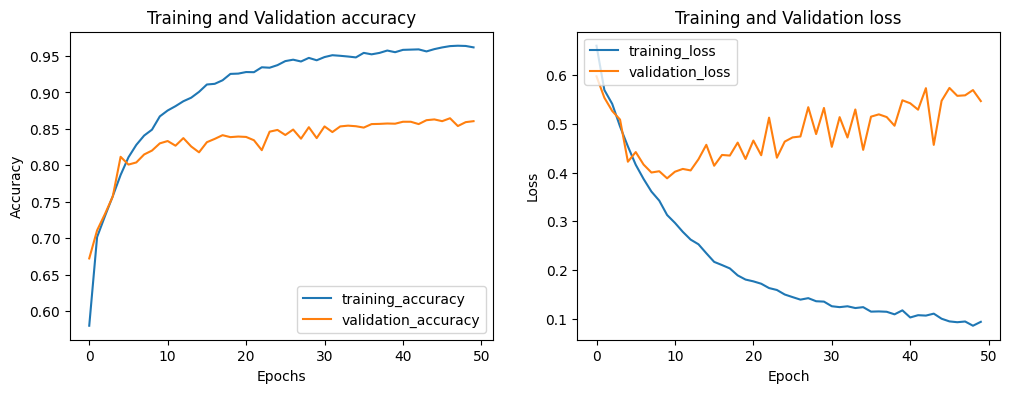

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(mod_4.history['accuracy'], label= 'training_accuracy')
plt.plot(mod_4.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(mod_4.history['loss'], label='training_loss')
plt.plot(mod_4.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation loss')

In [ ]:
model_4.evaluate(test_ds)

147/147 [==============================] - 15s 101ms/step - loss: 0.5154 - accuracy: 0.8605


[0.5154352188110352, 0.8605296611785889]

In [ ]:
# Model 4.2 w/ Dropout (0.2-0.5)
model_42=Sequential()

model_42.add(Conv2D(filters=32, kernel_size=(3,3),input_shape = (128,128,3)))
model_42.add(Activation(activation="relu"))
model_42.add(MaxPooling2D(pool_size=(2,2)))
model_42.add(Dropout(0.2))

model_42.add(Conv2D(filters=64, kernel_size=(3,3)))
model_42.add(Activation(activation="relu"))
model_42.add(MaxPooling2D(pool_size=(2,2))) 
model_42.add(Dropout(0.2))

model_42.add(Conv2D(filters=128, kernel_size=(3,3)))
model_42.add(Activation(activation="relu"))
model_42.add(MaxPooling2D(pool_size=(2,2)))
model_42.add(Dropout(0.2)) 

model_42.add(Flatten())
model_42.add(Dense(64)) 
model_42.add(Activation("relu"))
model_42.add(Dropout(0.5))

model_42.add(Dense(1))
model_42.add(Activation("sigmoid"))

In [ ]:
model_42.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics= ["accuracy"])
model_42.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 activation_6 (Activation)   (None, 61, 61, 64)        0         
                                                      

In [ ]:
mod_42 = model_42.fit(training_ds,epochs=50,validation_data = validation_ds)

Epoch 1/50
469/469 [==============================] - 74s 153ms/step - loss: 0.6678 - accuracy: 0.5813 - val_loss: 0.6193 - val_accuracy: 0.6344
Epoch 2/50
469/469 [==============================] - 62s 133ms/step - loss: 0.5753 - accuracy: 0.6997 - val_loss: 0.5183 - val_accuracy: 0.7562
Epoch 3/50
469/469 [==============================] - 61s 130ms/step - loss: 0.5033 - accuracy: 0.7625 - val_loss: 0.4900 - val_accuracy: 0.7682
Epoch 4/50
469/469 [==============================] - 63s 133ms/step - loss: 0.4459 - accuracy: 0.7939 - val_loss: 0.4132 - val_accuracy: 0.8131
Epoch 5/50
469/469 [==============================] - 63s 134ms/step - loss: 0.4045 - accuracy: 0.8170 - val_loss: 0.4098 - val_accuracy: 0.8163
Epoch 6/50
469/469 [==============================] - 63s 134ms/step - loss: 0.3713 - accuracy: 0.8328 - val_loss: 0.4048 - val_accuracy: 0.8200
Epoch 7/50
469/469 [==============================] - 61s 131ms/step - loss: 0.3445 - accuracy: 0.8512 - val_loss: 0.4122 - val_ac

Text(0.5, 1.0, 'Training and Validation loss')

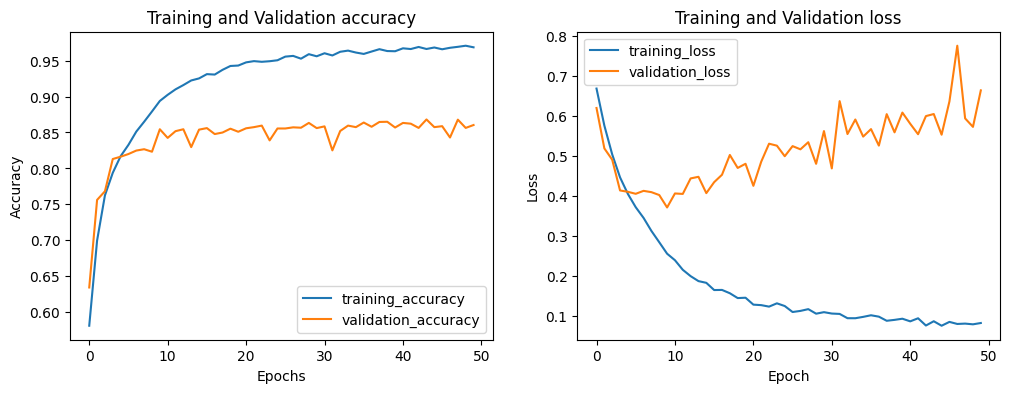

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(mod_42.history['accuracy'], label= 'training_accuracy')
plt.plot(mod_42.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(mod_42.history['loss'], label='training_loss')
plt.plot(mod_42.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation loss')

In [ ]:
model_42.evaluate(test_ds)

147/147 [==============================] - 15s 101ms/step - loss: 0.6142 - accuracy: 0.8642


[0.6141777038574219, 0.8641605973243713]